<a href="https://colab.research.google.com/github/evellynliena/PrakBigData/blob/master/Week1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

df.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



In [14]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [
    ("Ali", 34, "M", "Gaming", "Doctor"),
    ("Budi", 23, "M", "Sport", "Teacher"),
    ("Citra", 29, "F", "Singing", "Engineer"),
    ("Dina", 45, "F", "Knitting", "Nurse")
]
columns = ["Name", "Age", "Gender", "Hobby", "Job"]
df = spark.createDataFrame(data, columns)

df.show()

+-----+---+------+--------+--------+
| Name|Age|Gender|   Hobby|     Job|
+-----+---+------+--------+--------+
|  Ali| 34|     M|  Gaming|  Doctor|
| Budi| 23|     M|   Sport| Teacher|
|Citra| 29|     F| Singing|Engineer|
| Dina| 45|     F|Knitting|   Nurse|
+-----+---+------+--------+--------+



In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

df.show()

df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [9]:
import pandas as pd

data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


In [15]:
import pandas as pd

data = [
    ("Ali", 34, "M", "Gaming", "Doctor"),
    ("Budi", 23, "M", "Sport", "Teacher"),
    ("Citra", 29, "F", "Singing", "Engineer"),
    ("Dina", 45, "F", "Knitting", "Nurse")
]
columns = ["Name", "Age", "Gender", "Hobby", "Job"]

df_pandas = pd.DataFrame(data, columns=columns)

df_filtered = df_pandas[df_pandas["Age"] >= 30]

print("DataFrame setelah filtering (Age >= 30):")
display(df_filtered)

DataFrame setelah filtering (Age >= 30):


,Name,Age,Gender,Hobby,Job
0,Ali,34,M,Gaming,Doctor
3,Dina,45,F,Knitting,Nurse


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


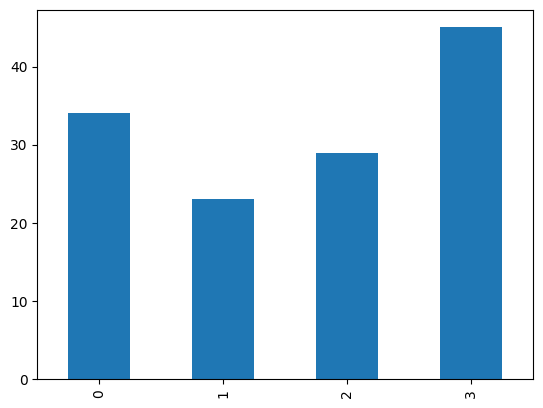

In [16]:
import pandas as pd

data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

print(df_pandas.describe())

import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [17]:
df_pandas_from_spark = df.toPandas()

df_spark_from_pandas = spark.createDataFrame(df_pandas)

df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Name  Age Gender     Hobby       Job
 0    Ali   34      M    Gaming    Doctor
 1   Budi   23      M     Sport   Teacher
 2  Citra   29      F   Singing  Engineer
 3   Dina   45      F  Knitting     Nurse,
 None)

In [20]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col

spark = SparkSession.builder.appName("PandasSparkExample").getOrCreate()

data = [
    ("Ali", 34, "M", "Gaming", "Doctor"),
    ("Budi", 23, "M", "Sport", "Teacher"),
    ("Citra", 29, "F", "Singing", "Engineer"),
    ("Dina", 45, "F", "Knitting", "Nurse")
]
columns = ["Name", "Age", "Gender", "Hobby", "Job"]

df_pandas = pd.DataFrame(data, columns=columns)
print("Pandas DataFrame:")
display(df_pandas)

df_spark_from_pandas = spark.createDataFrame(df_pandas)

print("\nSpark DataFrame:")
df_spark_from_pandas.show()

df_pandas_from_spark = df_spark_from_pandas.toPandas()
print("\nDataFrame hasil konversi dari Spark ke Pandas:")
display(df_pandas_from_spark)

print("\nRata-rata Age (dari Spark):")
df_spark_from_pandas.groupBy().agg(avg("Age")).show()

Pandas DataFrame:


,Name,Age,Gender,Hobby,Job
0,Ali,34,M,Gaming,Doctor
1,Budi,23,M,Sport,Teacher
2,Citra,29,F,Singing,Engineer
3,Dina,45,F,Knitting,Nurse



Spark DataFrame:
+-----+---+------+--------+--------+
| Name|Age|Gender|   Hobby|     Job|
+-----+---+------+--------+--------+
|  Ali| 34|     M|  Gaming|  Doctor|
| Budi| 23|     M|   Sport| Teacher|
|Citra| 29|     F| Singing|Engineer|
| Dina| 45|     F|Knitting|   Nurse|
+-----+---+------+--------+--------+


DataFrame hasil konversi dari Spark ke Pandas:


,Name,Age,Gender,Hobby,Job
0,Ali,34,M,Gaming,Doctor
1,Budi,23,M,Sport,Teacher
2,Citra,29,F,Singing,Engineer
3,Dina,45,F,Knitting,Nurse



Rata-rata Age (dari Spark):
+--------+
|avg(Age)|
+--------+
|   32.75|
+--------+



In [22]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("CombinePandasAndSpark").getOrCreate()

data_pandas = [
    ("Citra", 29, "F", "Singing", "Engineer"),
    ("Dina", 45, "F", "Knitting", "Nurse")
]
columns = ["Name", "Age", "Gender", "Hobby", "Job"]

df_pandas = pd.DataFrame(data_pandas, columns=columns)
print("Data dari Pandas:")
display(df_pandas)

data_spark = [
    ("Ali", 34, "M", "Gaming", "Doctor"),
    ("Budi", 23, "M", "Sport", "Teacher")
]

df_spark = spark.createDataFrame(data_spark, columns)
print("\nData dari Spark:")
df_spark.show()

df_from_spark = df_spark.toPandas()

df_combined = pd.concat([df_pandas, df_from_spark], ignore_index=True)

print("\nData gabungan Pandas + Spark:")
display(df_combined)

max_age = df_combined["Age"].max()
print(f"\nNilai maksimum usia dari data gabungan = {max_age}")


Data dari Pandas:


,Name,Age,Gender,Hobby,Job
0,Citra,29,F,Singing,Engineer
1,Dina,45,F,Knitting,Nurse



Data dari Spark:
+----+---+------+------+-------+
|Name|Age|Gender| Hobby|    Job|
+----+---+------+------+-------+
| Ali| 34|     M|Gaming| Doctor|
|Budi| 23|     M| Sport|Teacher|
+----+---+------+------+-------+


Data gabungan Pandas + Spark:


,Name,Age,Gender,Hobby,Job
0,Citra,29,F,Singing,Engineer
1,Dina,45,F,Knitting,Nurse
2,Ali,34,M,Gaming,Doctor
3,Budi,23,M,Sport,Teacher



Nilai maksimum usia dari data gabungan = 45
